In [1]:
# With pandas, one can efficiently analyze, manipulate, and process data 
import pandas as pd

In [2]:
# pd.read_csv() function in pandas is used to read data from a CSV file and create a DataFrame object.
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45680 entries, 0 to 45679
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45680 non-null  int64  
 1   SOURCE_KEY           45680 non-null  object 
 2   DC_POWER             45680 non-null  float64
 3   AC_POWER             45680 non-null  float64
 4   DAILY_YIELD          45680 non-null  float64
 5   TOTAL_YIELD          45680 non-null  float64
 6   DATE_TIME            45680 non-null  object 
 7   AMBIENT_TEMPERATURE  45680 non-null  float64
 8   MODULE_TEMPERATURE   45680 non-null  float64
 9   IRRADIATION          45680 non-null  float64
 10  DATE                 45680 non-null  object 
 11  TIME                 45680 non-null  object 
 12  DAY                  45680 non-null  int64  
 13  MONTH                45680 non-null  int64  
 14  WEEK                 45680 non-null  int64  
 15  HOURS                45680 non-null 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

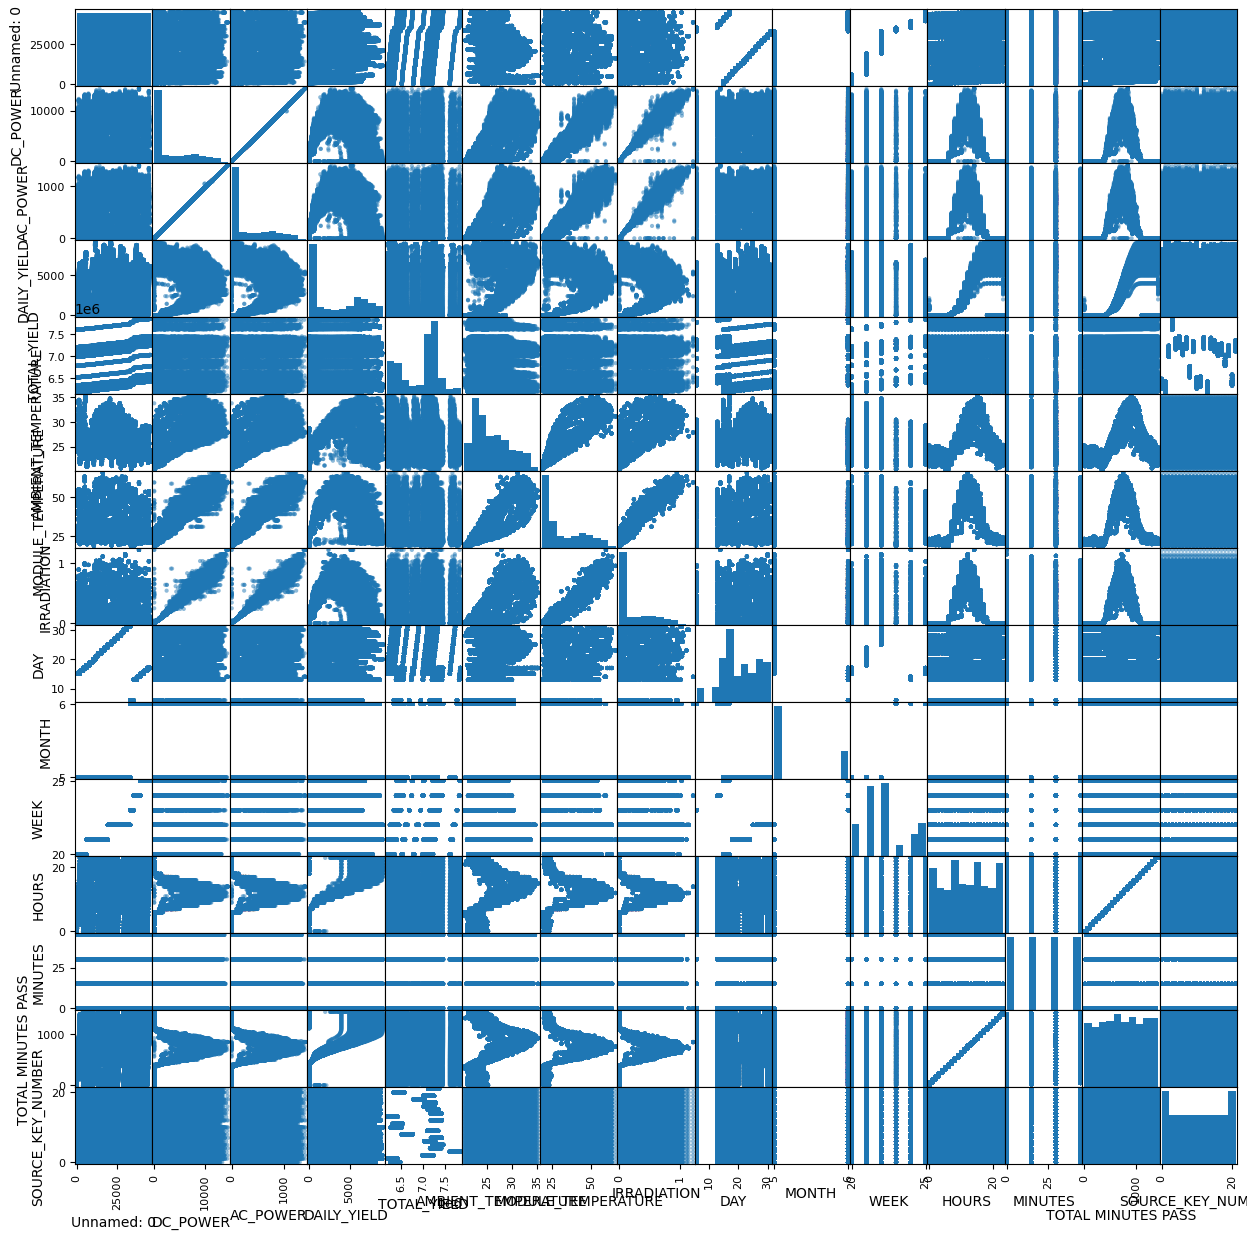

In [5]:
#correlation

pd.plotting.scatter_matrix(data, figsize=(15,15))

plt.show()

####  creates a scatter matrix plot ,a scatter matrix plot is a grid of scatter plots that allows us to visualize the pairwise relationships between multiple variables in a dataset

#### calculate the correlation matrix

In [6]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,SOURCE_KEY_NUMBER
Unnamed: 0,1.000000,-0.016338,-0.016333,0.035585,0.179783,-0.170281,-0.064143,-0.020969,-0.073803,0.773500,0.942025,0.039645,0.001936,0.039695,-0.004346
DC_POWER,-0.016338,1.000000,0.999996,0.076710,0.004055,0.703796,0.954692,0.991305,0.049284,-0.042781,-0.029993,0.012174,-0.000089,0.012161,0.001987
AC_POWER,-0.016333,0.999996,1.000000,0.076628,0.004043,0.704035,0.954810,0.991260,0.049162,-0.042688,-0.029943,0.012144,-0.000099,0.012131,0.001990
DAILY_YIELD,0.035585,0.076710,0.076628,1.000000,0.007277,0.489709,0.203702,0.071937,0.030742,-0.012850,-0.008640,0.823608,0.015915,0.823653,-0.016097
TOTAL_YIELD,0.179783,0.004055,0.004043,0.007277,1.000000,-0.036532,-0.014713,-0.004981,-0.053243,0.167196,0.182590,0.005257,0.000088,0.005257,0.039886
AMBIENT_TEMPERATURE,-0.170281,0.703796,0.704035,0.489709,-0.036532,1.000000,0.843456,0.702218,0.164977,-0.237136,-0.214439,0.323144,-0.000860,0.322871,-0.001363
MODULE_TEMPERATURE,-0.064143,0.954692,0.954810,0.203702,-0.014713,0.843456,1.000000,0.959346,0.105859,-0.116531,-0.092254,0.103834,-0.003603,0.103610,0.000343
IRRADIATION,-0.020969,0.991305,0.991260,0.071937,-0.004981,0.702218,0.959346,1.000000,0.056562,-0.051316,-0.037322,0.009266,-0.001372,0.009203,0.000925
DAY,-0.073803,0.049284,0.049162,0.030742,-0.053243,0.164977,0.105859,0.056562,1.000000,-0.678315,-0.282778,0.015689,-0.001047,0.015635,-0.002701
MONTH,0.773500,-0.042781,-0.042688,-0.012850,0.167196,-0.237136,-0.116531,-0.051316,-0.678315,1.000000,0.882285,-0.012082,0.000818,-0.012040,-0.001248


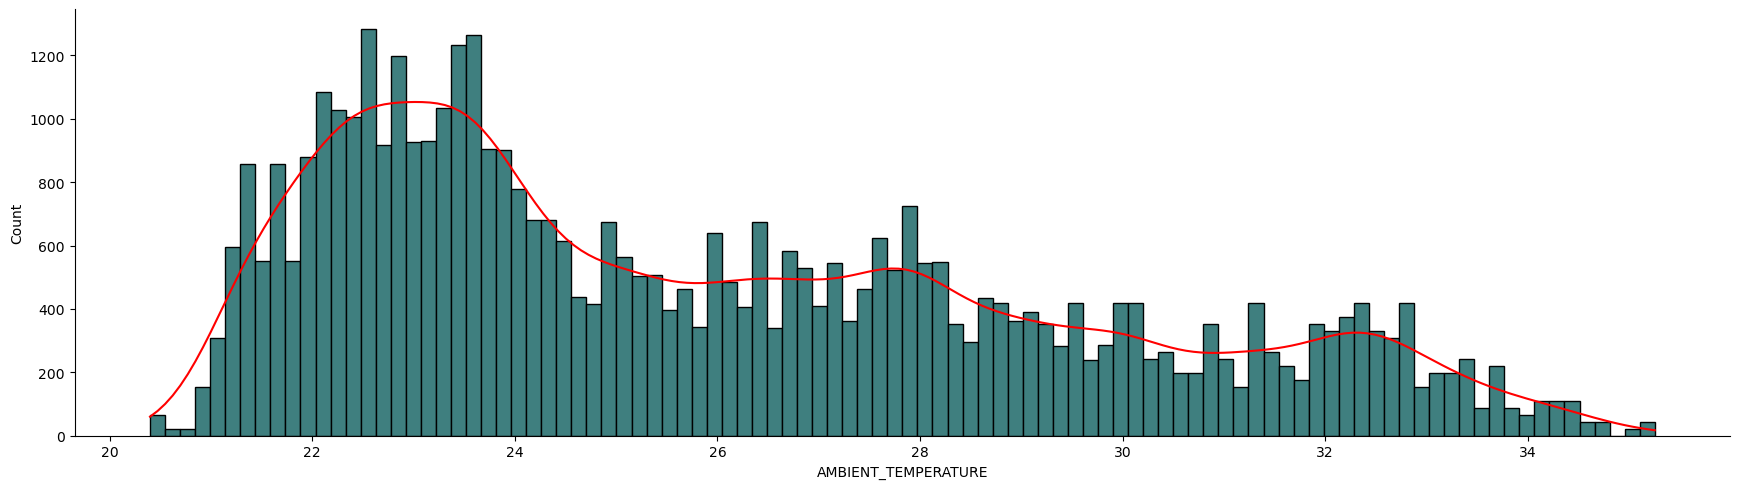

In [7]:
# displot function to create a histogram with a kernel density estimate (KDE) for the "AMBIENT_TEMPERATURE" 

sns.displot(data=data, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

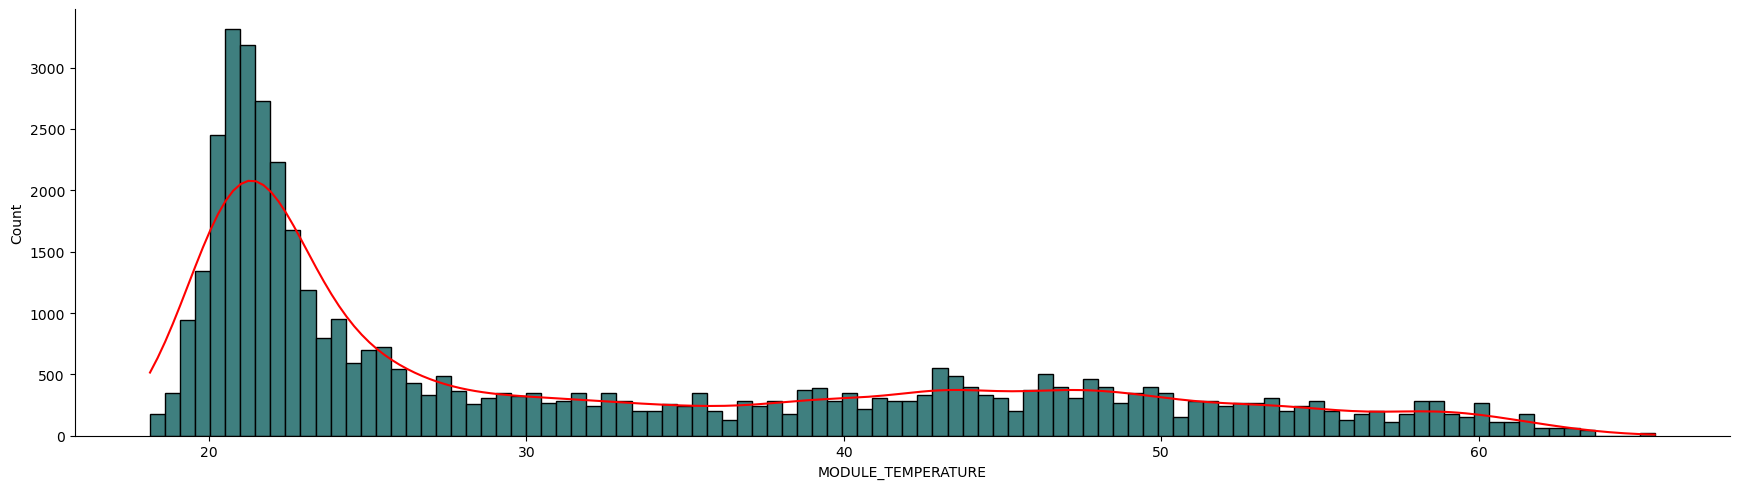

In [8]:
# displot function to create a histogram with a kernel density estimate (KDE) for the "MODULE_TEMPERATURE" 

sns.displot(data=data, x="MODULE_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

## Count of days the data is collected for.

In [9]:
data['DATE'].nunique()

23

#### The data of solar power generation is of 23 days

## DC Power Generation per day

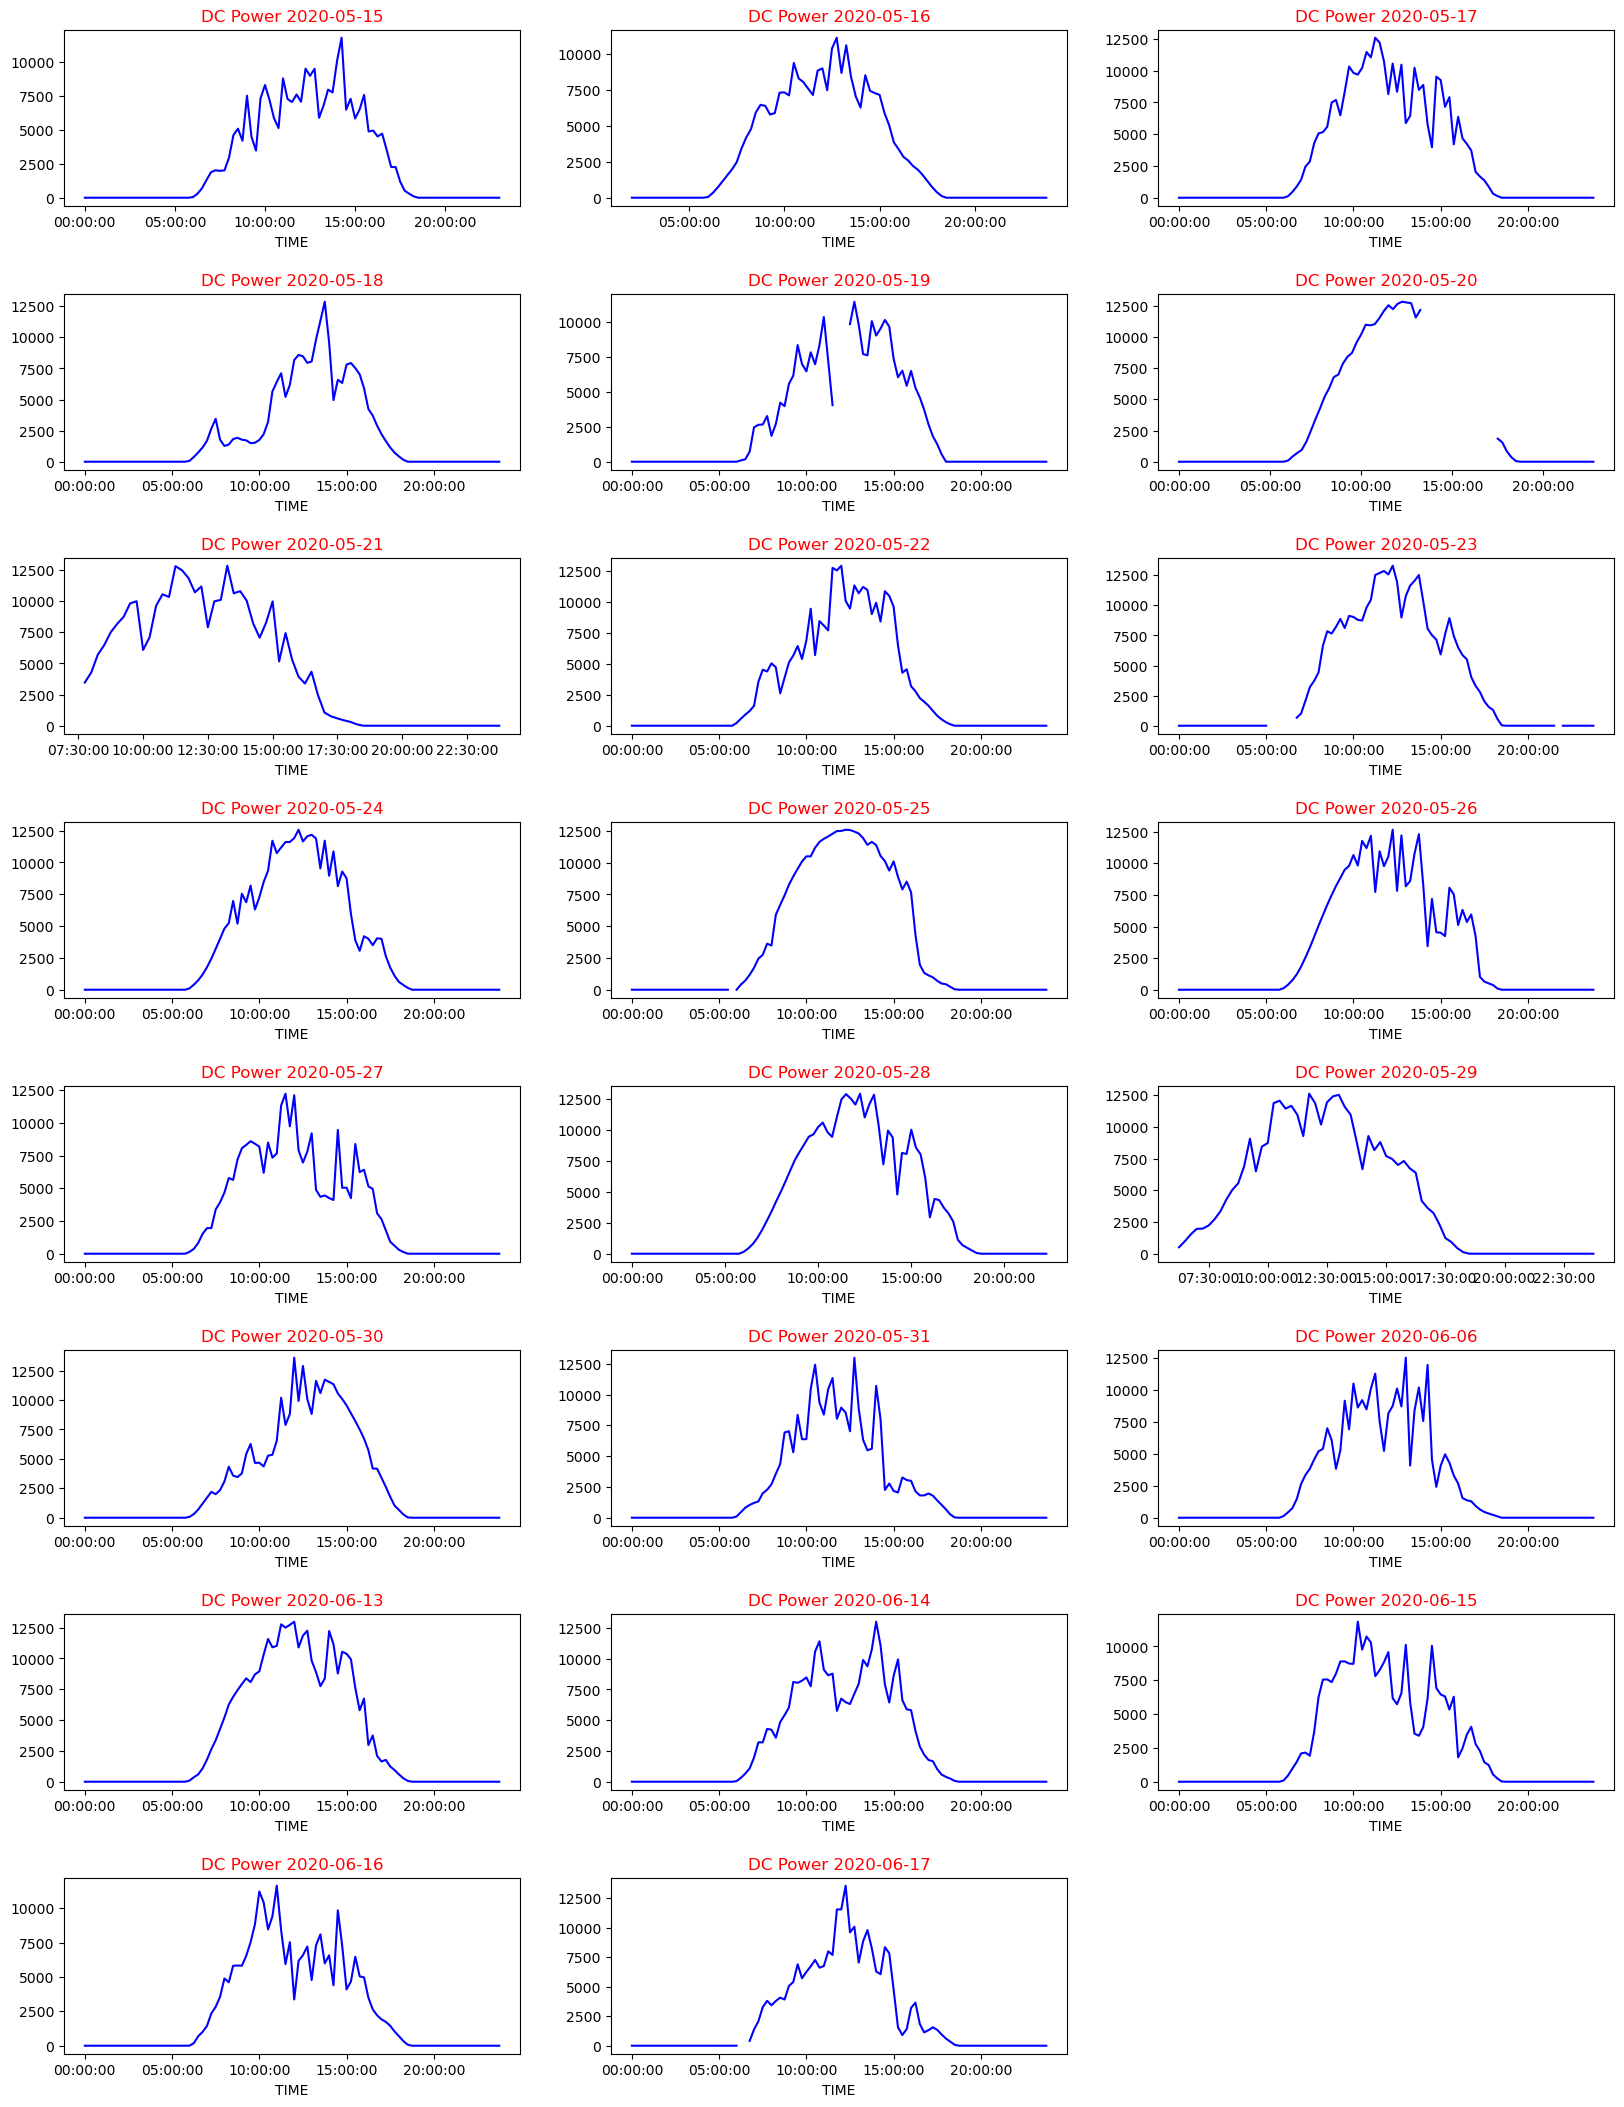

In [10]:
solar_dc = data.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_dc, row=12, col=3)

The above plot shows that there is some fluctuation in the power generation. 

Less Fluctuation in DC power generation is observed in the below mentioned days.

    2020-05-15
    2020-05-18
    2020-05-22
    2020-05-23
    2020-05-24
    2020-05-25
    2020-05-26

High Fluctuation in DC power generation is observed in the below mentioned days.

    2020-05-19
    2020-05-28
    2020-05-29
    2020-06-02
    2020-06-03
    2020-06-04
    2020-06-13
    2020-06-14
    2020-06-17

Very High Fluctuation & Reduction in DC power generation is observed in in the below mentioned days.

    2020-06-03
    2020-06-11
    2020-06-12
    2020-06-15

Note: Reason for very high Fluctuation & Reduction in DC Power generation could be due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further

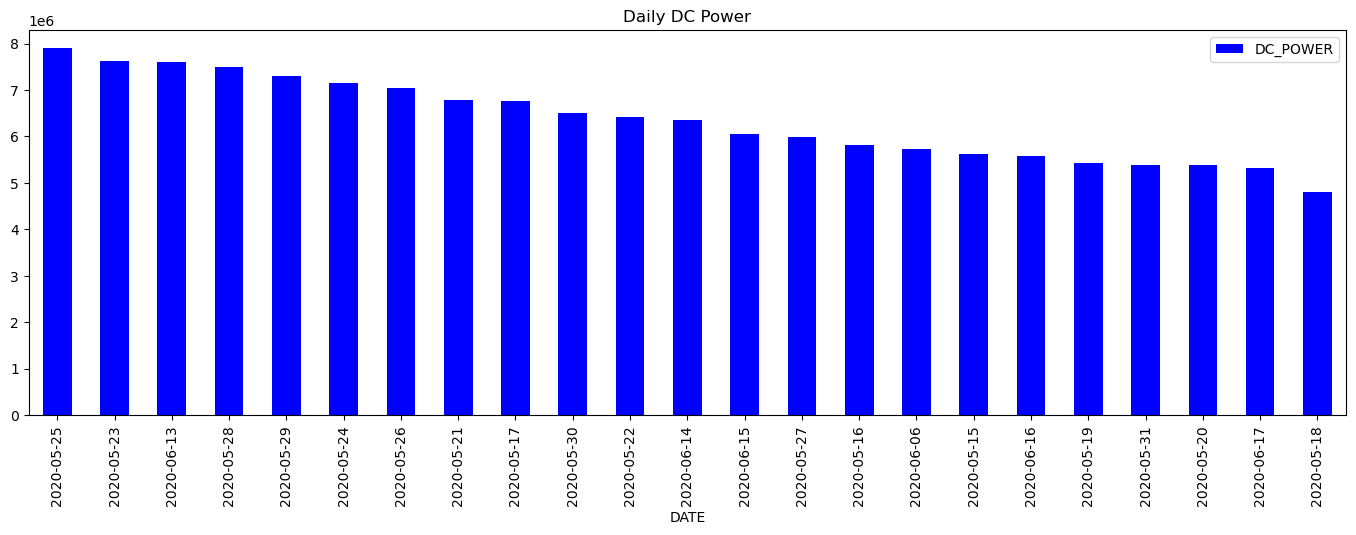

In [11]:
#  group the data by the 'DATE' and calculate the sum of 'DC_POWER' for each date

daily_dc = data.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('Daily DC Power')
plt.show()

#### Highest average DC_POWER Generation is on: 2020-05-25

#### Lowest average DC_POWER Generation is on : 2020-05-18


## Irradiation Generation per day 

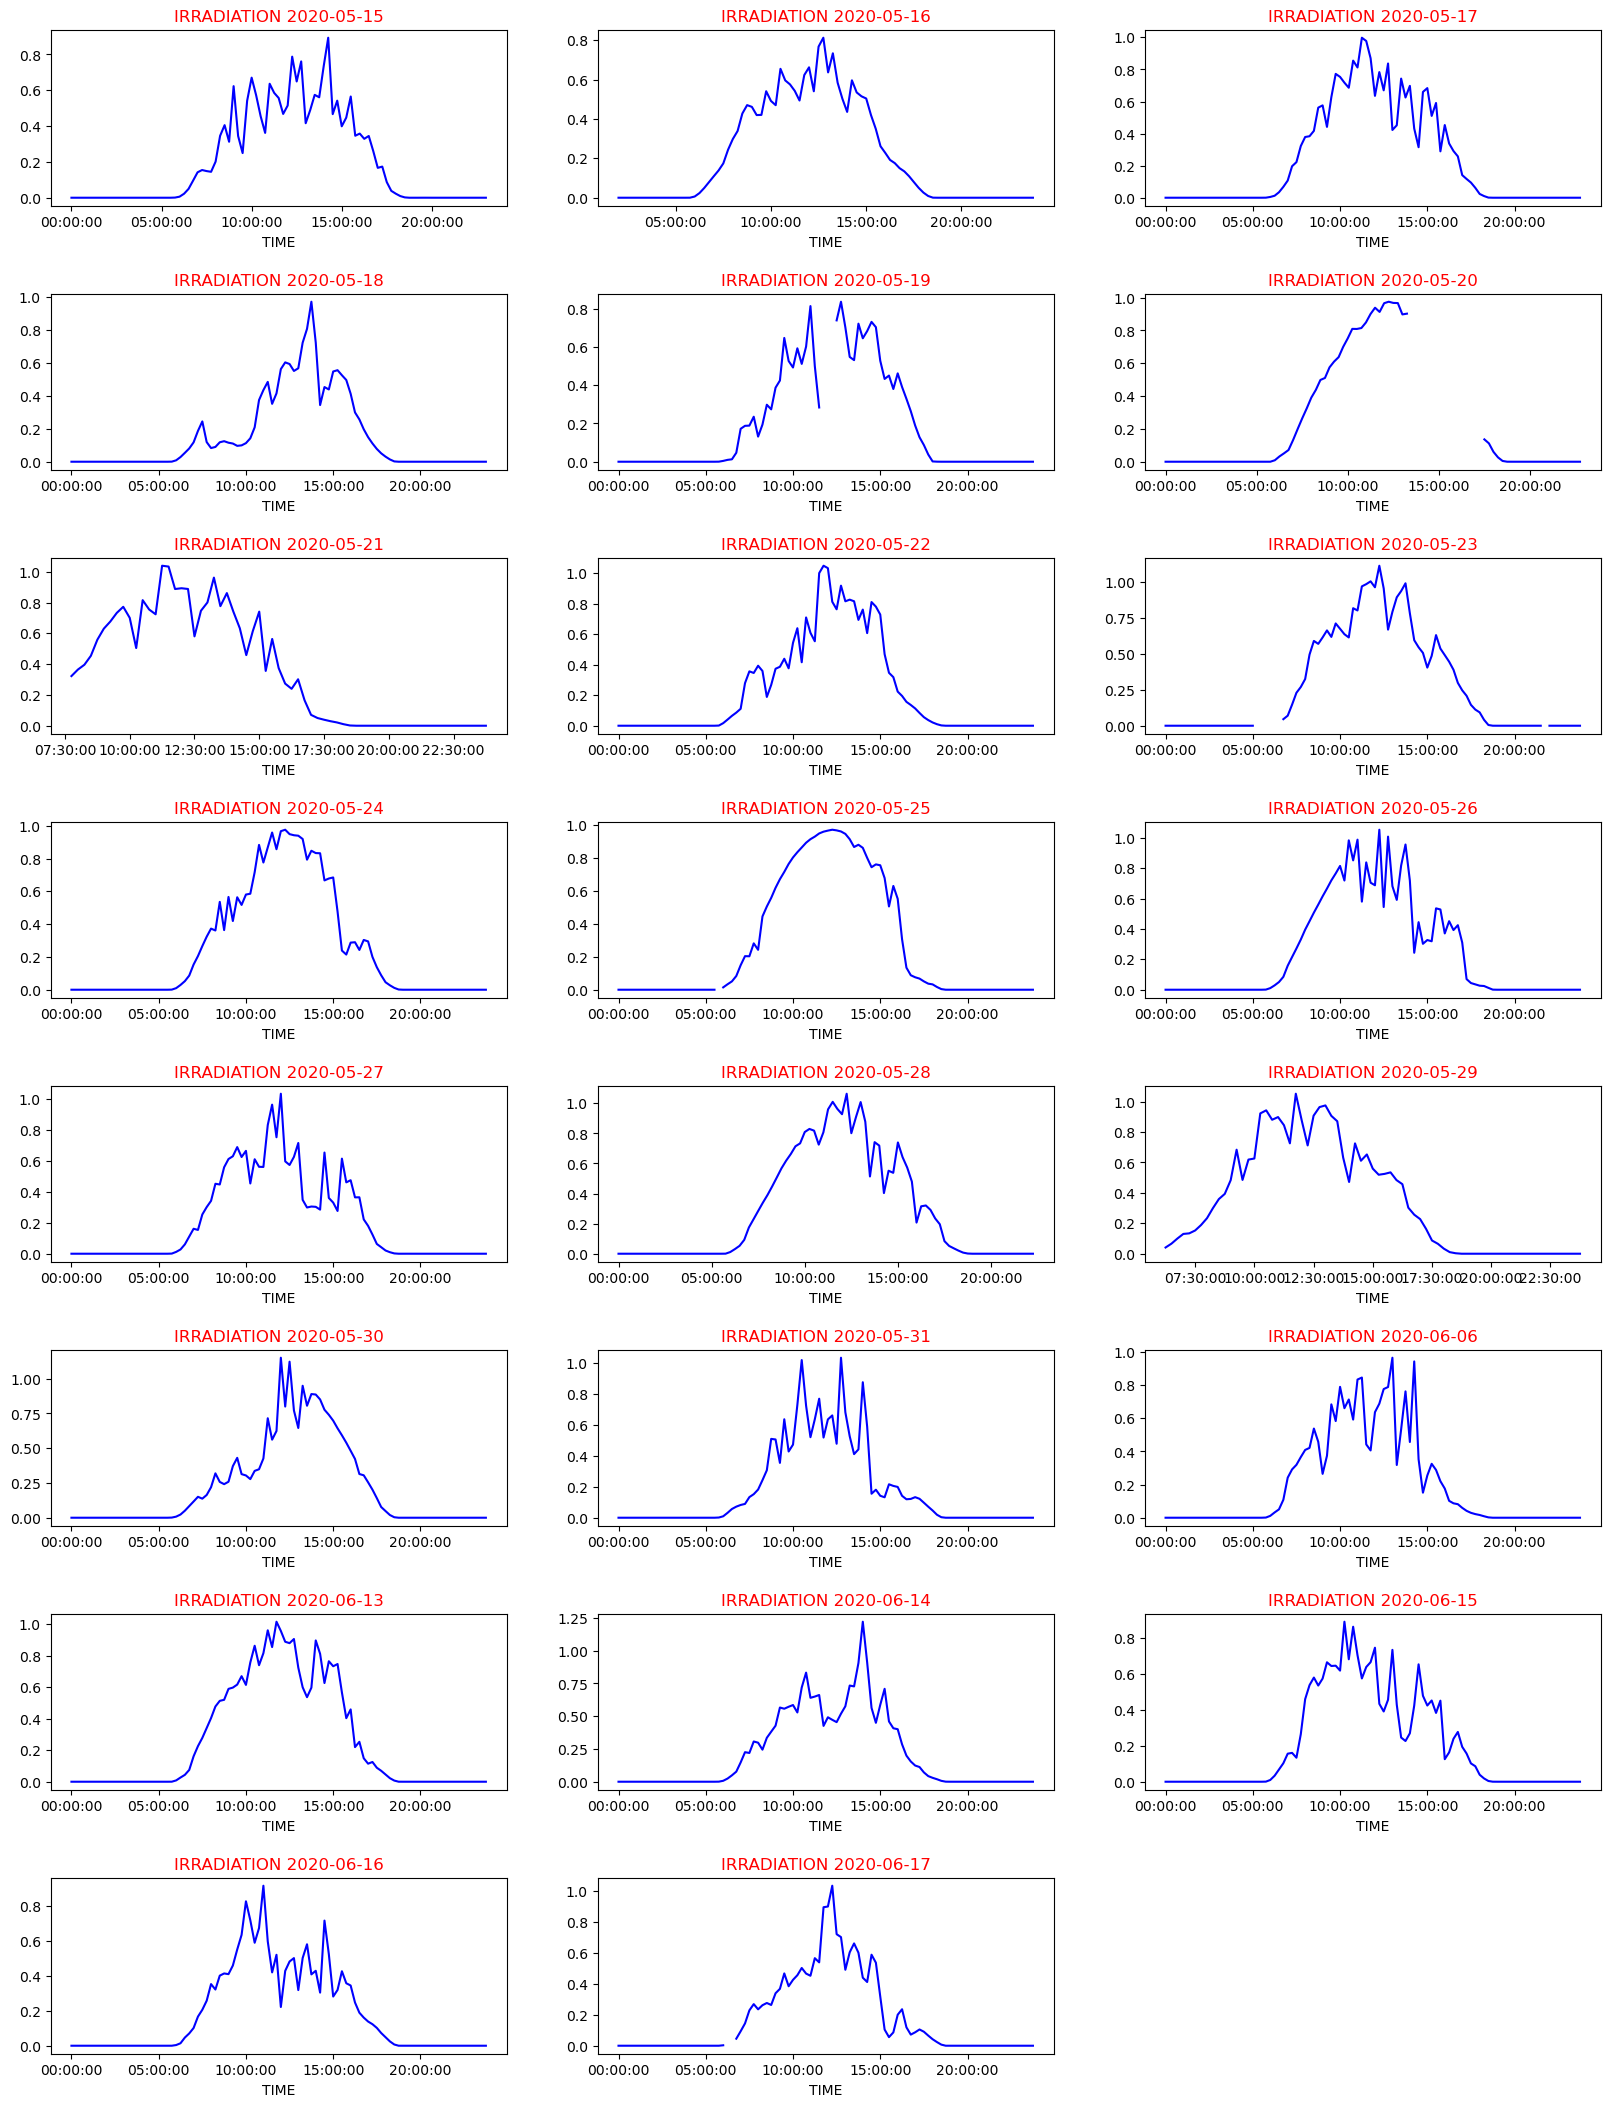

In [12]:
solar_irradiation = data.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

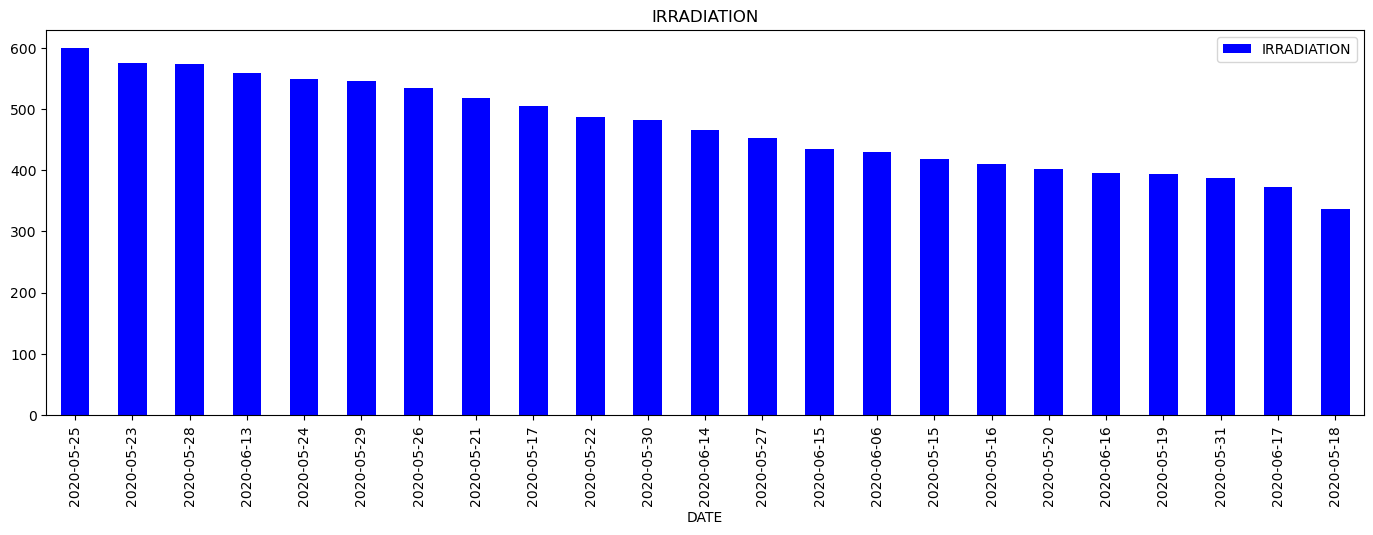

In [13]:
# groups the data by the 'DATE' and calculates the sum of 'IRRADIATION' for each date

daily_irradiation = data.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

#### Highest average IRRADIATION is on: 2020-05-25

#### Lowest average IRRADIATION is on : 2020-05-18

## Ambient Temperature per day

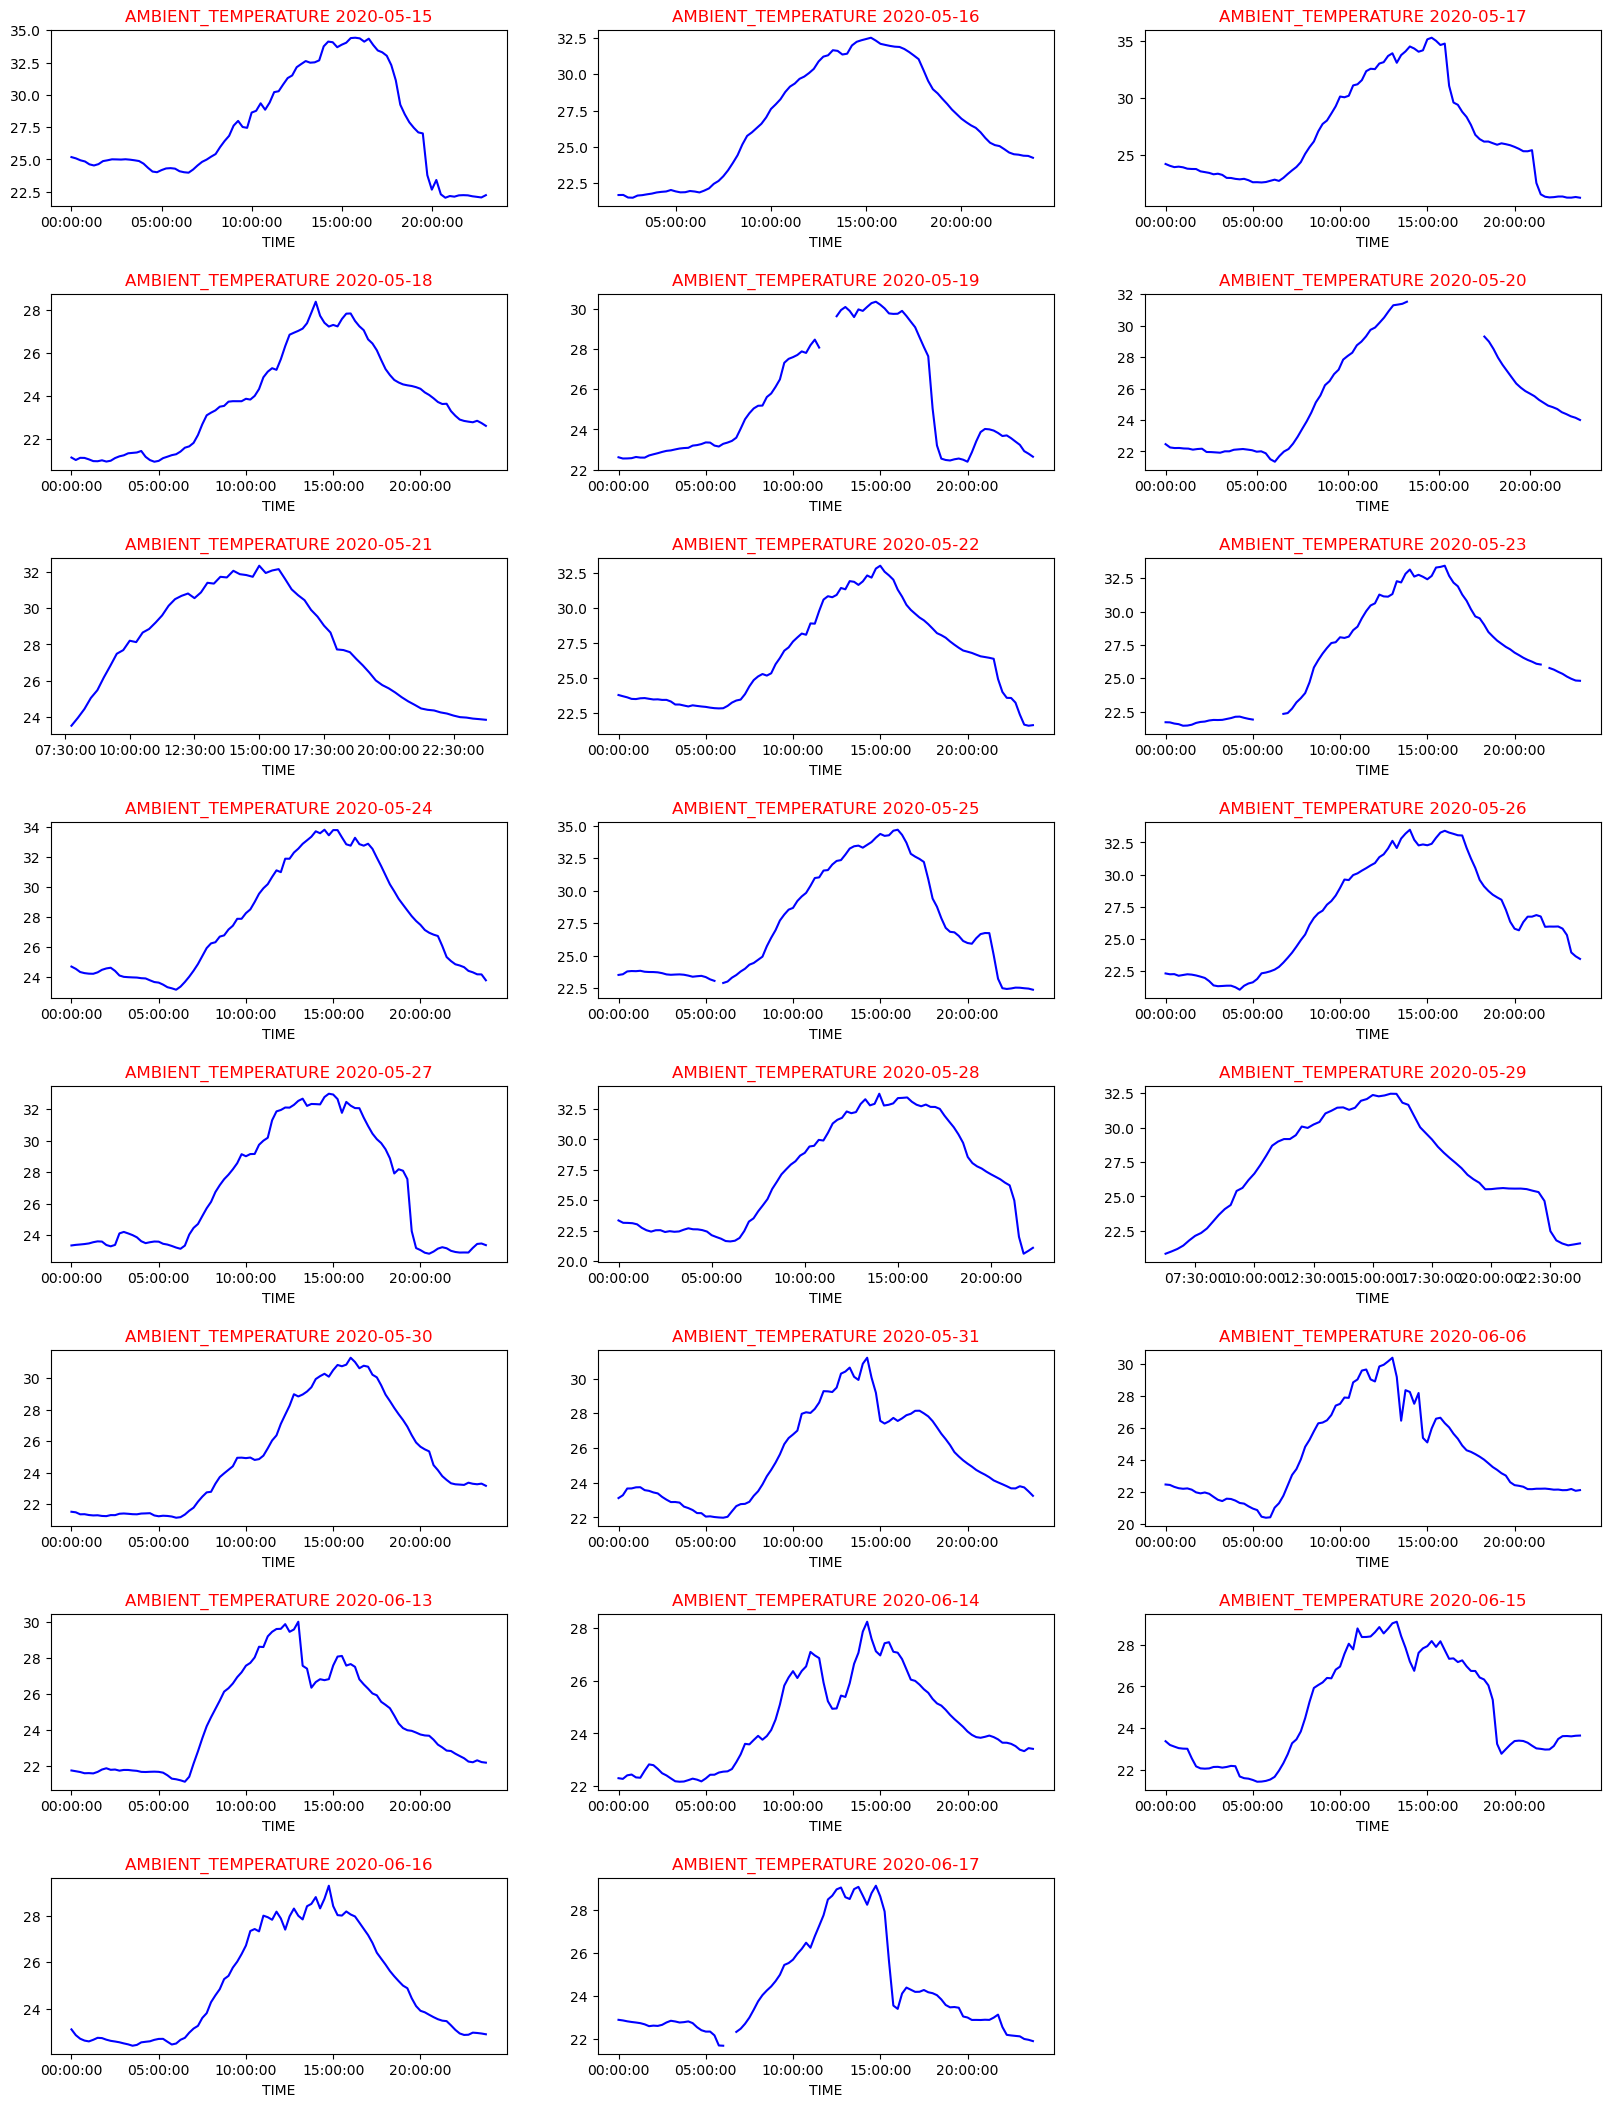

In [14]:
solar_ambiant_temp = data.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

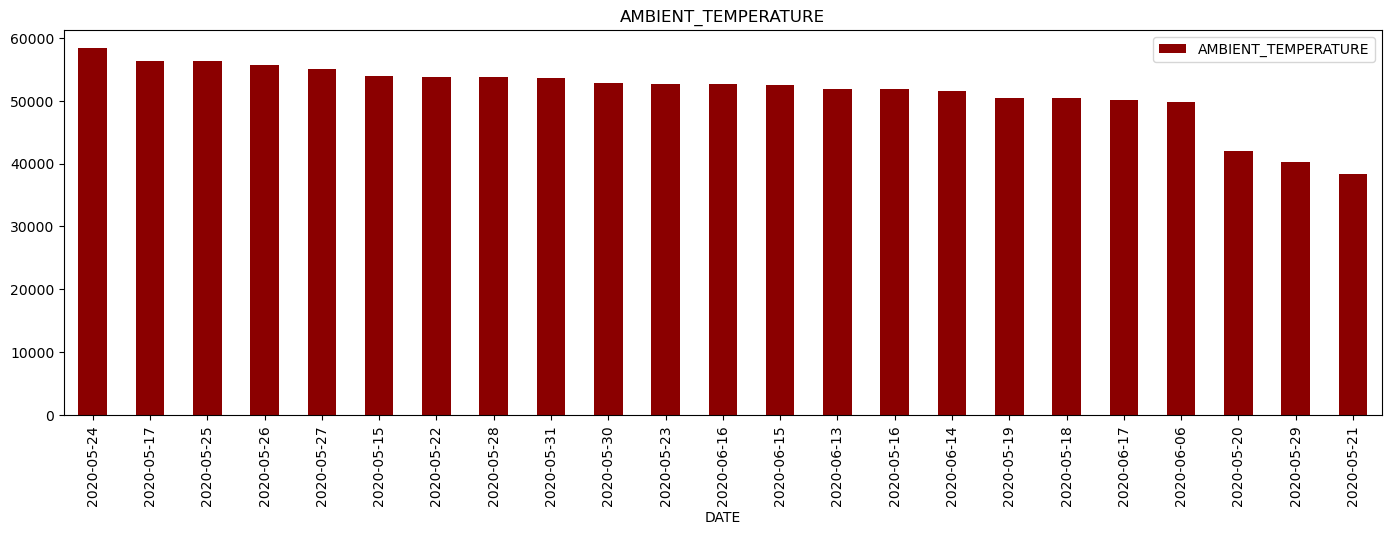

In [15]:
# groups the data by the 'DATE' and calculates the sum of 'AMBIENT_TEMPERATURE' for each date

daily_ambient_temp = data.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkred')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

Highest average DC_POWER is generated on "2020-05-25"

### Comparision between Best and Worst Power generation

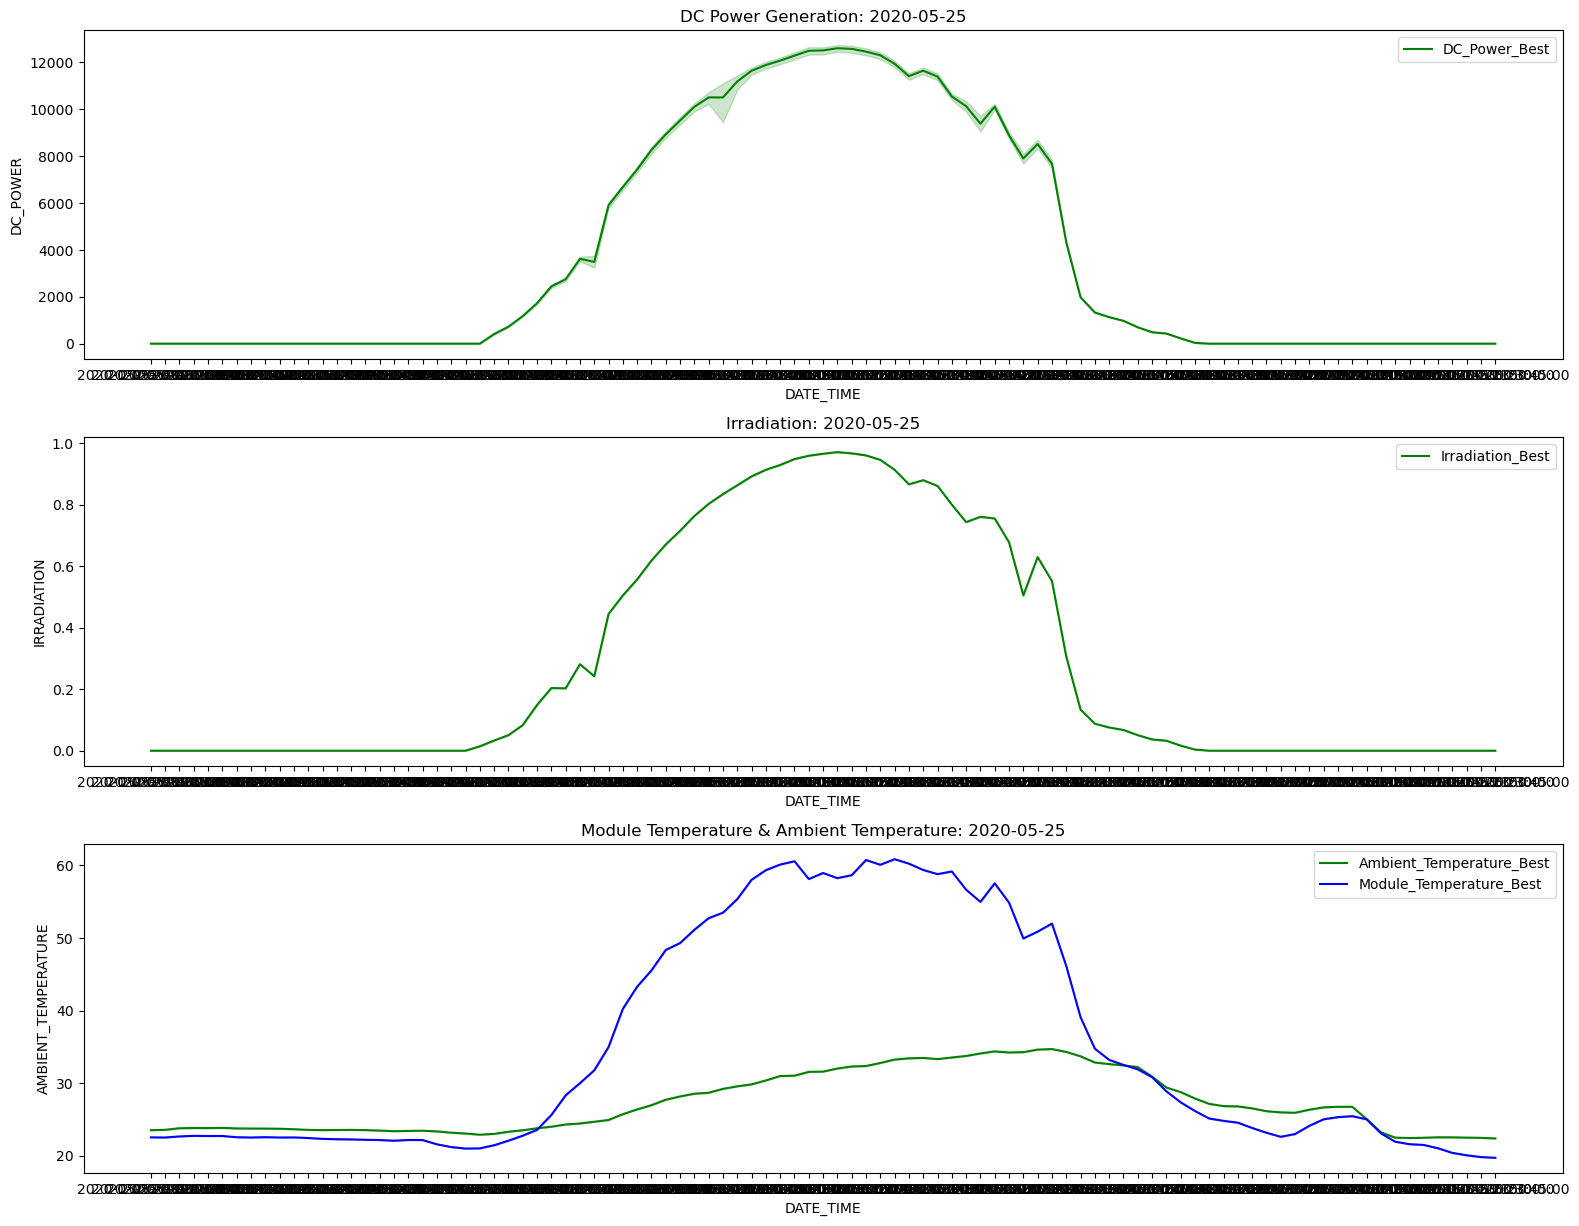

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))

date = ["2020-05-25"]

plt.subplot(411)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].IRRADIATION, label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='green')
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


Lowest average DC_POWER is generated on "2020-06-18"

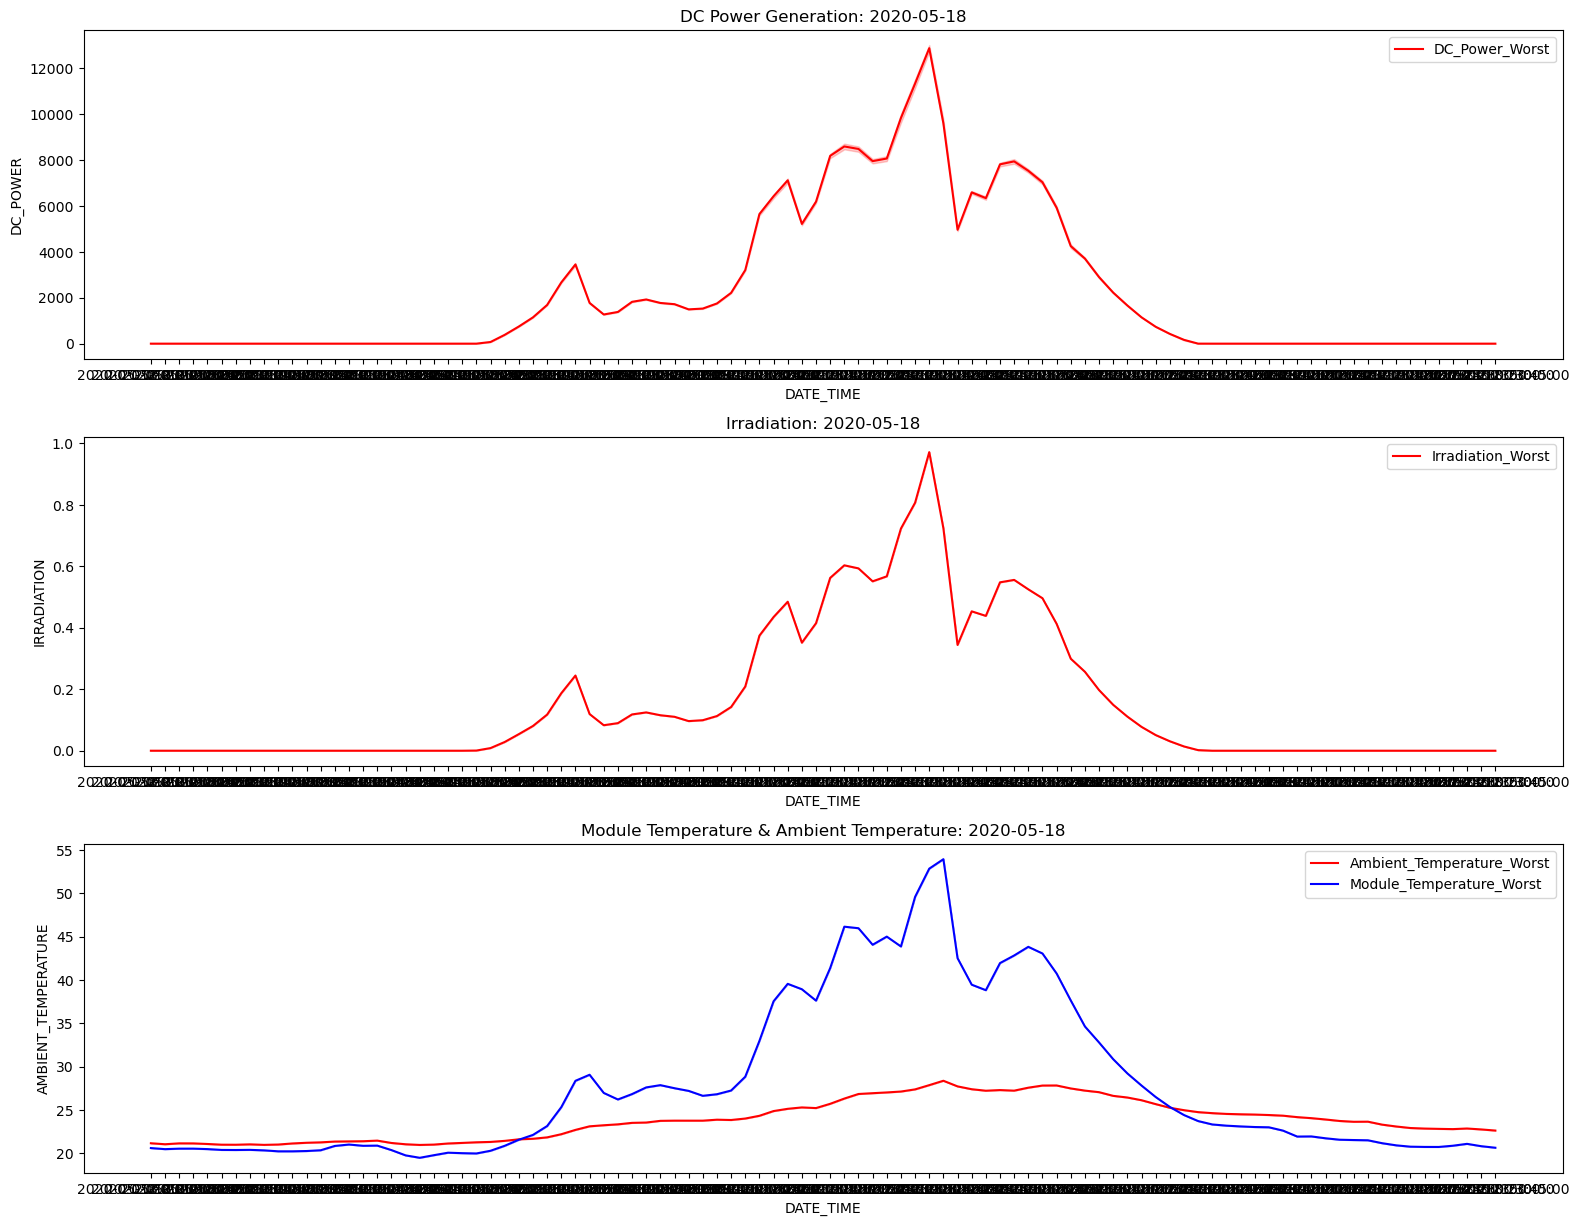

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

date = ["2020-05-18"]
plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].IRRADIATION, label="Irradiation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


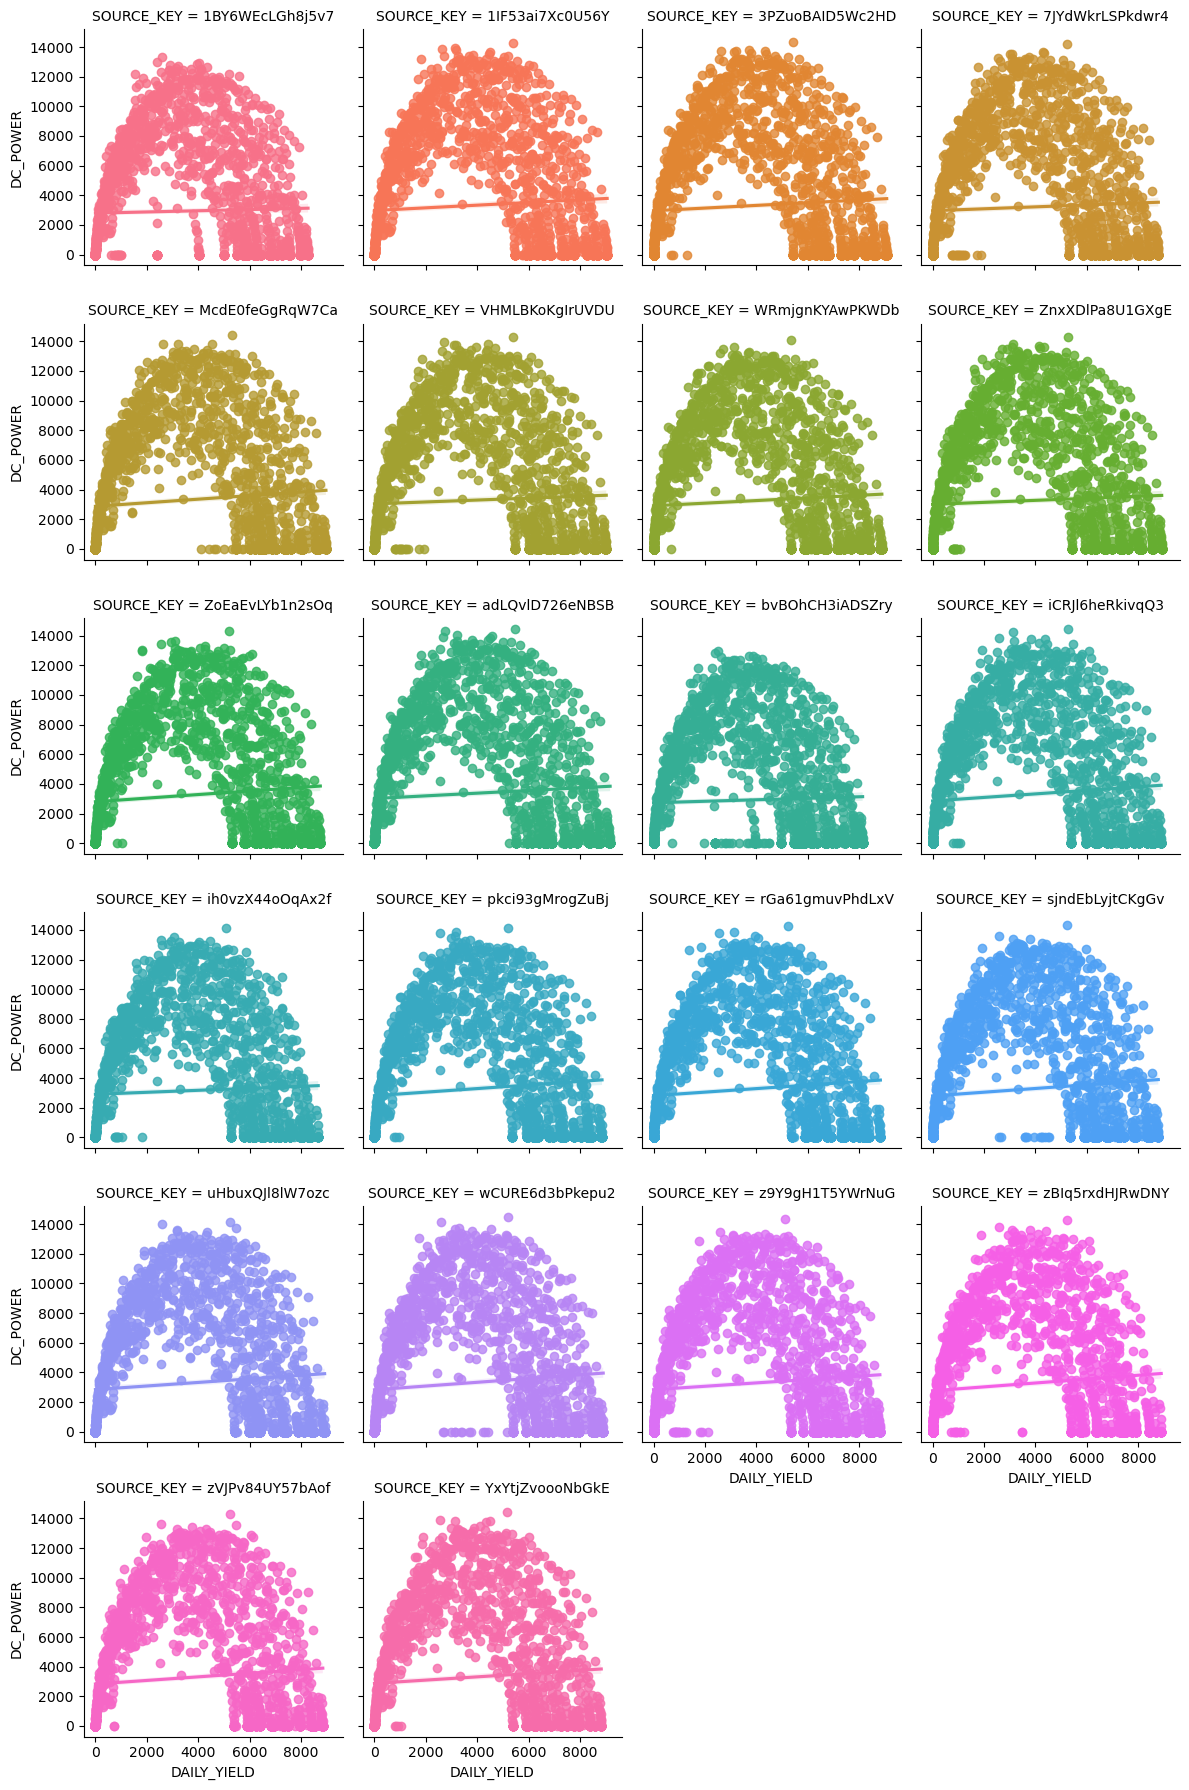

In [20]:
#  to create a scatter plot which plots the relationship between 'DC_POWER' (y-axis) and 'DAILY_YIELD' (x-axis) attributes for each 'SOURCE_KEY' value. 

sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=data,fit_reg=True);

## Solar Power Plant Inverter Efficiency Calculation

In [21]:
solar_dc_power = data[data['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = data[data['AC_POWER'] > 0]['AC_POWER'].values

In [22]:
solar_dc_power.max()

14471.125

In [23]:
solar_ac_power.max()

1410.95

In [24]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power conversion Efficiency ratio AC/DC of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power conversion Efficiency ratio AC/DC of Solar Power Plant:  9.750 %
